## Integrantes:
- Luis Francisco Rodriguez Acevedo

# Clasificación de hongos

## Lectura de datos

In [ ]:
import pandas as pd

# Lee el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Vision_computo/Mushrooms classification/Mushrooms classification/mushrooms.csv')

# Obtén la columna 'class'
class_column = df['class']

# Obtén las demás columnas excluyendo la columna 'class'
other_columns = df.drop(columns=['class'])

# Muestra las primeras filas de cada variable
print("Variable 'class':")
print(class_column.head())

print("\nOtras columnas:")
print(other_columns.head())



Variable 'class':
0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

Otras columnas:
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Creacion del modelo

In [ ]:

# Lee el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Vision_computo/Mushrooms classification/Mushrooms classification/mushrooms.csv')

# Obtén la columna 'class'
class_column = df['class']

# Obtén las demás columnas excluyendo la columna 'class'
other_columns = df.drop(columns=['class'])

# Codifica las variables categóricas utilizando one-hot encoding
other_columns_encoded = pd.get_dummies(other_columns)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(other_columns_encoded, class_column, test_size=0.2, random_state=42)

# Crea el modelo de árbol de decisión
tree_model = DecisionTreeClassifier()

# Entrena el modelo
tree_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
predictions = tree_model.predict(X_test)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print("Precisión del árbol de decisión:", accuracy)

Precisión del árbol de decisión: 1.0


## Grafica de arbol de decision

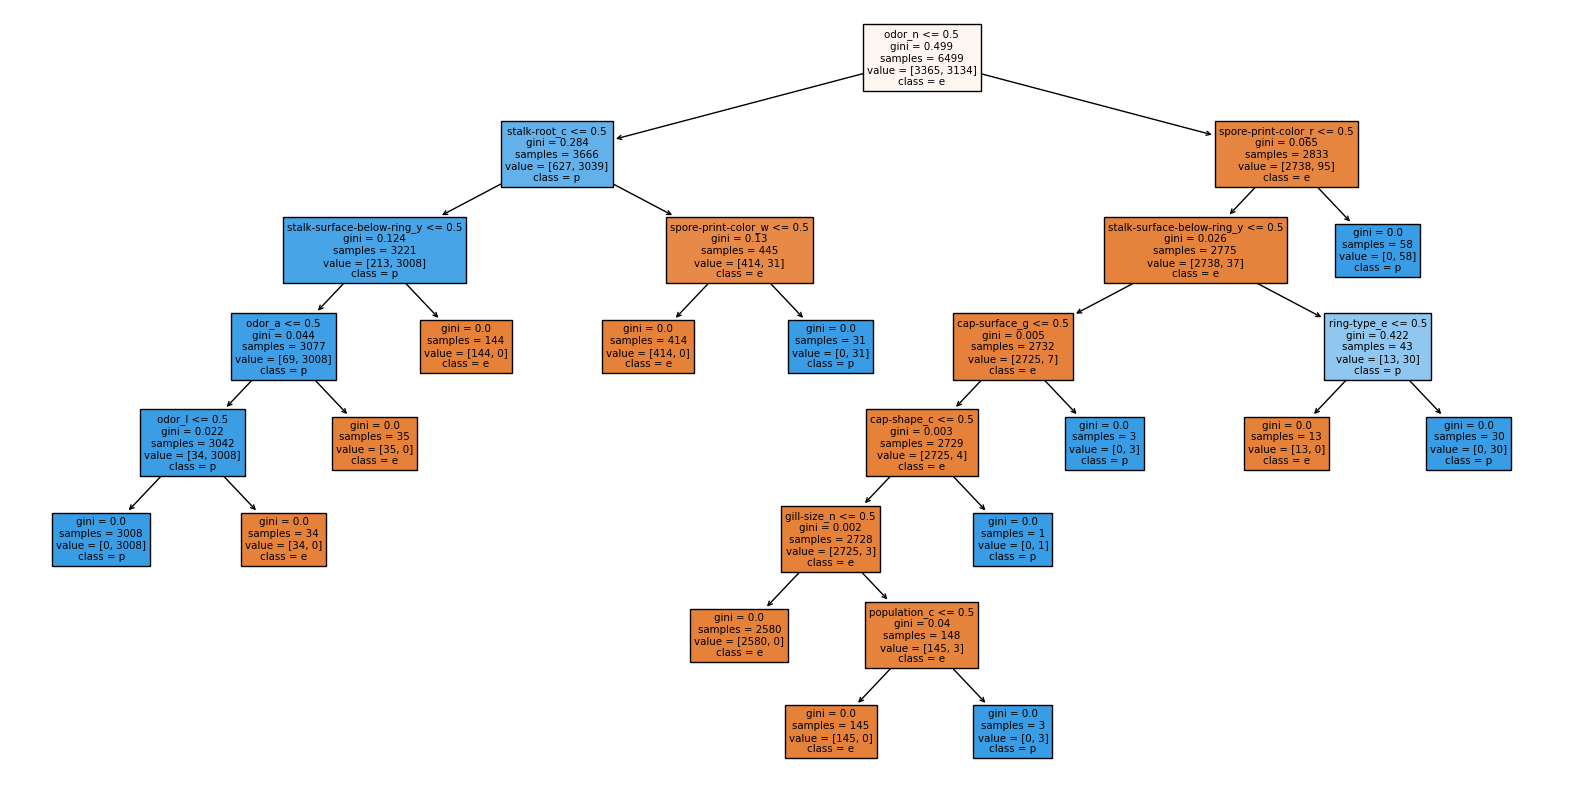

In [ ]:
from sklearn.tree import plot_tree

# Grafica el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=other_columns_encoded.columns, class_names=tree_model.classes_, filled=True)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

## Grafica de la curva ROC

Precisión del árbol de decisión: 1.0
Recall del árbol de decisión: 1.0
F1-score del árbol de decisión: 1.0
Matriz de confusión:
[[843   0]
 [  0 782]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


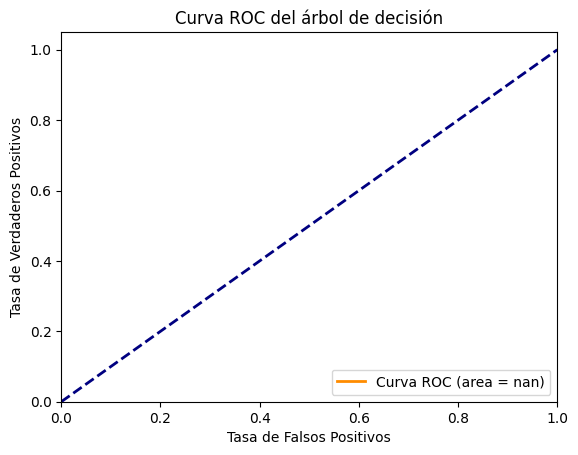

In [ ]:

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print("Precisión del árbol de decisión:", accuracy)

# Calcula el recall
recall = recall_score(y_test, predictions, average='weighted')
print("Recall del árbol de decisión:", recall)

# Calcula el F1-score
f1 = f1_score(y_test, predictions, average='weighted')
print("F1-score del árbol de decisión:", f1)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
print("Matriz de confusión:")
print(conf_matrix)

# Calcula la curva ROC
y_probs = tree_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del árbol de decisión')
plt.legend(loc="lower right")
plt.show()